In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the requests library.
import requests

# Import the API Key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eae283ab1f5578df1cbfd6dfc98ead41


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | dujuma
Processing Record 2 of Set 1 | dujuma
Processing Record 3 of Set 1 | dujuma
Processing Record 4 of Set 1 | dujuma
Processing Record 5 of Set 1 | dujuma
Processing Record 6 of Set 1 | dujuma
Processing Record 7 of Set 1 | dujuma
Processing Record 8 of Set 1 | dujuma
Processing Record 9 of Set 1 | dujuma
Processing Record 10 of Set 1 | dujuma
Processing Record 11 of Set 1 | dujuma
Processing Record 12 of Set 1 | dujuma
Processing Record 13 of Set 1 | dujuma
Processing Record 14 of Set 1 | dujuma
Processing Record 15 of Set 1 | dujuma
Processing Record 16 of Set 1 | dujuma
Processing Record 17 of Set 1 | dujuma
Processing Record 18 of Set 1 | dujuma
Processing Record 19 of Set 1 | dujuma
Processing Record 20 of Set 1 | dujuma
Processing Record 21 of Set 1 | dujuma
Processing Record 22 of Set 1 | dujuma
Processing Record 23 of Set 1 | dujuma
Processing Record 24 of Set 1 | dujuma
Processing Record 25 of Set 1 | dujuma
Processing Record 26 of Set 1 | du

In [11]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Processing Record 38 of Set 13 | ogdensburg
Processing Record 39 of Set 13 | constitucion
Processing Record 40 of Set 13 | belyy yar
Processing Record 41 of Set 13 | mataura
Processing Record 42 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 13 | ushuaia
Processing Record 44 of Set 13 | marcona
City not found. Skipping...
Processing Record 45 of Set 13 | lagoa
Processing Record 46 of Set 13 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 13 | saint-philippe
Processing Record 48 of Set 13 | juneau
Processing Record 49 of Set 13 | jamestown
Processing Record 50 of Set 13 | whitehorse
Processing Record 51 of Set 13 | busselton
Processing Record 52 of Set 13 | rio grande
Processing Record 53 of Set 13 | sistranda
Processing Record 54 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 55 of Set 13 | hilo
Processing Record 56 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 57 of Set 13 | new norfol

Processing Record 30 of Set 16 | norilsk
Processing Record 31 of Set 16 | beloha
Processing Record 32 of Set 16 | iskateley
Processing Record 33 of Set 16 | doha
Processing Record 34 of Set 16 | pochutla
Processing Record 35 of Set 16 | luderitz
Processing Record 36 of Set 16 | jiaojiang
Processing Record 37 of Set 16 | acarau
Processing Record 38 of Set 16 | fonte boa
Processing Record 39 of Set 16 | lac du bonnet
Processing Record 40 of Set 16 | ilulissat
Processing Record 41 of Set 16 | ayagoz
Processing Record 42 of Set 16 | lufilufi
Processing Record 43 of Set 16 | atuona
Processing Record 44 of Set 16 | samarai
Processing Record 45 of Set 16 | deputatskiy
Processing Record 46 of Set 16 | lucea
Processing Record 47 of Set 16 | son la
Processing Record 48 of Set 16 | yambio
Processing Record 49 of Set 16 | roald
Processing Record 50 of Set 16 | harlingen
Processing Record 1 of Set 17 | bo phloi
Processing Record 2 of Set 17 | irtyshskiy
Processing Record 3 of Set 17 | nome
Processi

Processing Record 14 of Set 20 | ust-nera
Processing Record 15 of Set 20 | krasnokamensk
Processing Record 16 of Set 20 | havoysund
Processing Record 17 of Set 20 | sinnamary
Processing Record 18 of Set 20 | khandyga
Processing Record 19 of Set 20 | iquitos
Processing Record 20 of Set 20 | dauphin
Processing Record 21 of Set 20 | hachinohe
Processing Record 22 of Set 20 | mahebourg
Processing Record 23 of Set 20 | barbar
City not found. Skipping...
Processing Record 24 of Set 20 | san luis
Processing Record 25 of Set 20 | puerto escondido
Processing Record 26 of Set 20 | marsh harbour
Processing Record 27 of Set 20 | piney green
Processing Record 28 of Set 20 | saurimo
Processing Record 29 of Set 20 | piacabucu
Processing Record 30 of Set 20 | burnie
Processing Record 31 of Set 20 | necochea
Processing Record 32 of Set 20 | sitka
Processing Record 33 of Set 20 | kloulklubed
Processing Record 34 of Set 20 | mutsamudu
City not found. Skipping...
Processing Record 35 of Set 20 | agadez
Pr

Processing Record 45 of Set 23 | coacoyul
Processing Record 46 of Set 23 | cairns
Processing Record 47 of Set 23 | bozhou
Processing Record 48 of Set 23 | imbituba
Processing Record 49 of Set 23 | fairview
Processing Record 50 of Set 23 | mattru
Processing Record 1 of Set 24 | manyana
Processing Record 2 of Set 24 | kazachinskoye
Processing Record 3 of Set 24 | atar
Processing Record 4 of Set 24 | walvis bay
Processing Record 5 of Set 24 | asyut
Processing Record 6 of Set 24 | agadir
Processing Record 7 of Set 24 | san isidro
Processing Record 8 of Set 24 | panjab
Processing Record 9 of Set 24 | omboue
Processing Record 10 of Set 24 | evensk
Processing Record 11 of Set 24 | singkang
Processing Record 12 of Set 24 | boromlya
Processing Record 13 of Set 24 | ngukurr
City not found. Skipping...
Processing Record 14 of Set 24 | sabang
Processing Record 15 of Set 24 | guerrero negro
Processing Record 16 of Set 24 | gornopravdinsk
Processing Record 17 of Set 24 | pisco
Processing Record 18 o

In [12]:
len(city_data)

568

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ogdensburg,44.6942,-75.4863,58.30,41,1,9.22,US,2021-05-27 23:25:55
1,Constitucion,-35.3333,-72.4167,56.26,94,100,4.74,CL,2021-05-27 23:25:38
2,Belyy Yar,53.6039,91.3903,58.89,94,75,7.87,RU,2021-05-27 23:25:55
3,Mataura,-46.1927,168.8643,49.48,95,100,0.74,NZ,2021-05-27 23:25:55
4,Ushuaia,-54.8000,-68.3000,29.86,93,75,19.57,AR,2021-05-27 23:25:06
5,Lagoa,39.0500,-27.9833,58.84,59,99,7.27,PT,2021-05-27 23:25:56
6,Saint-Philippe,-21.3585,55.7679,71.19,80,39,4.54,RE,2021-05-27 23:21:32
7,Juneau,58.3019,-134.4197,53.60,65,90,4.00,US,2021-05-27 23:25:56
8,Jamestown,42.0970,-79.2353,64.09,49,1,3.00,US,2021-05-27 23:25:00
9,Whitehorse,60.7161,-135.0538,65.01,26,75,15.99,CA,2021-05-27 23:25:56


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ogdensburg,US,2021-05-27 23:25:55,44.6942,-75.4863,58.30,41,1,9.22
1,Constitucion,CL,2021-05-27 23:25:38,-35.3333,-72.4167,56.26,94,100,4.74
2,Belyy Yar,RU,2021-05-27 23:25:55,53.6039,91.3903,58.89,94,75,7.87
3,Mataura,NZ,2021-05-27 23:25:55,-46.1927,168.8643,49.48,95,100,0.74
4,Ushuaia,AR,2021-05-27 23:25:06,-54.8000,-68.3000,29.86,93,75,19.57
5,Lagoa,PT,2021-05-27 23:25:56,39.0500,-27.9833,58.84,59,99,7.27
6,Saint-Philippe,RE,2021-05-27 23:21:32,-21.3585,55.7679,71.19,80,39,4.54
7,Juneau,US,2021-05-27 23:25:56,58.3019,-134.4197,53.60,65,90,4.00
8,Jamestown,US,2021-05-27 23:25:00,42.0970,-79.2353,64.09,49,1,3.00
9,Whitehorse,CA,2021-05-27 23:25:56,60.7161,-135.0538,65.01,26,75,15.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City Id")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ogdensburg,US,2021-05-27 23:25:55,44.6942,-75.4863,58.30,41,1,9.22
1,Constitucion,CL,2021-05-27 23:25:38,-35.3333,-72.4167,56.26,94,100,4.74
2,Belyy Yar,RU,2021-05-27 23:25:55,53.6039,91.3903,58.89,94,75,7.87
3,Mataura,NZ,2021-05-27 23:25:55,-46.1927,168.8643,49.48,95,100,0.74
4,Ushuaia,AR,2021-05-27 23:25:06,-54.8000,-68.3000,29.86,93,75,19.57
...,...,...,...,...,...,...,...,...,...
563,Palana,RU,2021-05-27 23:28:23,59.1167,159.9667,32.92,99,100,8.63
564,Bubaque,GW,2021-05-27 23:25:17,11.2833,-15.8333,78.80,79,7,16.24
565,Le Pont-De-Claix,FR,2021-05-27 23:28:23,45.1244,5.7064,58.89,81,2,0.92
566,Husavik,IS,2021-05-27 23:28:23,66.0449,-17.3389,48.11,45,34,11.74


In [31]:
pd.read_csv("weather_data/cities.csv")

,City Id,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ogdensburg,US,2021-05-27 23:25:55,44.6942,-75.4863,58.30,41,1,9.22
1,1,Constitucion,CL,2021-05-27 23:25:38,-35.3333,-72.4167,56.26,94,100,4.74
2,2,Belyy Yar,RU,2021-05-27 23:25:55,53.6039,91.3903,58.89,94,75,7.87
3,3,Mataura,NZ,2021-05-27 23:25:55,-46.1927,168.8643,49.48,95,100,0.74
4,4,Ushuaia,AR,2021-05-27 23:25:06,-54.8000,-68.3000,29.86,93,75,19.57
...,...,...,...,...,...,...,...,...,...,...
563,563,Palana,RU,2021-05-27 23:28:23,59.1167,159.9667,32.92,99,100,8.63
564,564,Bubaque,GW,2021-05-27 23:25:17,11.2833,-15.8333,78.80,79,7,16.24
565,565,Le Pont-De-Claix,FR,2021-05-27 23:28:23,45.1244,5.7064,58.89,81,2,0.92
566,566,Husavik,IS,2021-05-27 23:28:23,66.0449,-17.3389,48.11,45,34,11.74


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


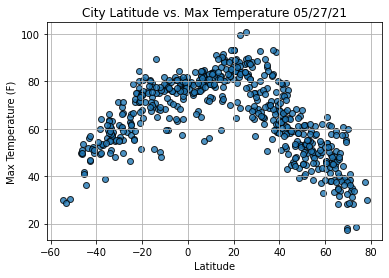

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

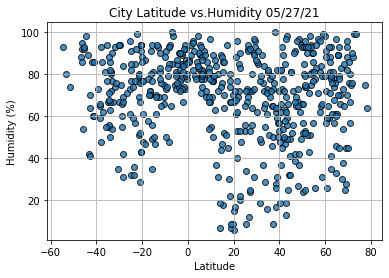

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

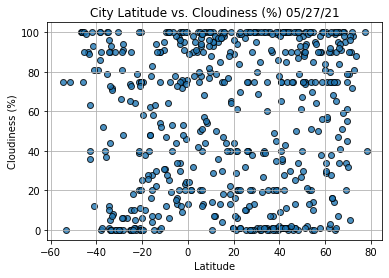

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

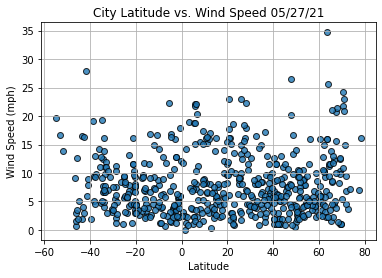

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [22]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2021-05-27 23:25:57
Lat                       19.7297
Lng                       -155.09
Max Temp                     80.8
Humidity                       70
Cloudiness                      1
Wind Speed                   11.5
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ogdensburg,US,2021-05-27 23:25:55,44.6942,-75.4863,58.30,41,1,9.22
2,Belyy Yar,RU,2021-05-27 23:25:55,53.6039,91.3903,58.89,94,75,7.87
5,Lagoa,PT,2021-05-27 23:25:56,39.0500,-27.9833,58.84,59,99,7.27
7,Juneau,US,2021-05-27 23:25:56,58.3019,-134.4197,53.60,65,90,4.00
8,Jamestown,US,2021-05-27 23:25:00,42.0970,-79.2353,64.09,49,1,3.00
...,...,...,...,...,...,...,...,...,...
562,Duluth,US,2021-05-27 23:24:06,46.7833,-92.1066,44.08,67,1,3.00
563,Palana,RU,2021-05-27 23:28:23,59.1167,159.9667,32.92,99,100,8.63
564,Bubaque,GW,2021-05-27 23:25:17,11.2833,-15.8333,78.80,79,7,16.24
565,Le Pont-De-Claix,FR,2021-05-27 23:28:23,45.1244,5.7064,58.89,81,2,0.92


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

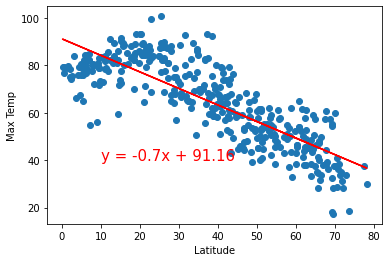

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

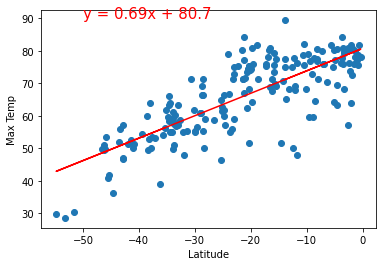

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

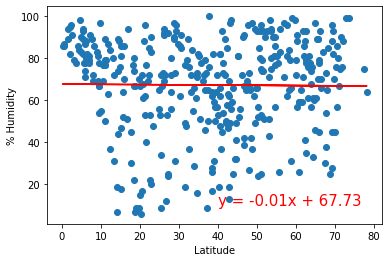

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

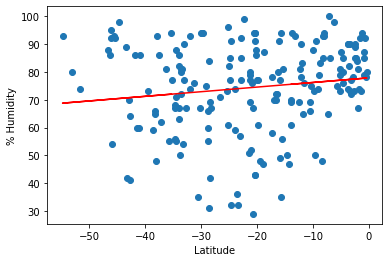

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

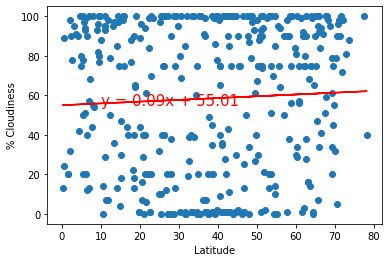

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \
                     for % Cloudiness', '% Cloudiness',(10,55))

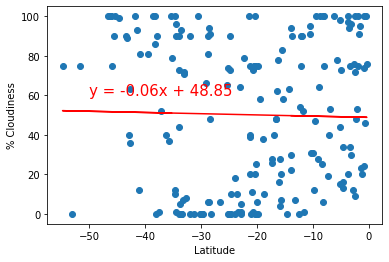

In [30]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Southern Hemisphere \
                     for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Import time
#time.sleep()
